***
**Durham University | MISCADA | Scientific Computing and Data Analysis<br>
Deep Learning for Computer Vision and Robotics | COMP52715 | Coursework: Task 1 - 3D PacMan <br>
Teng Wang | dgwz78 | Apr 2024**
***

In [1]:
import cProfile
import pstats
import numpy
import matplotlib.pyplot as plt

from lib import PacMan_Helper as PacMan
from lib import PacMan_Helper_Accelerated as PacManBoost

In [2]:
# Initialise the scene
global_cloud, spheres_collected = PacMan.startup_scene()

# Create current camera position and angle
position = numpy.zeros([3])
angle = numpy.zeros([3])

In [3]:
def profile_pointcloud_processing():
    # Obtain image and associated maps
    image, map1, map2, map3, map4 = PacMan.project_pointcloud_image(global_cloud, angle, position)
    return image, map1, map2, map3, map4

In [4]:
def profile_pointcloud_processing_boost():
    # Obtain image and associated maps
    image, map1, map2, map3, map4 = PacManBoost.project_pointcloud_image(global_cloud, angle, position)
    return image, map1, map2, map3, map4

In [5]:
# setup profiler
profiler = cProfile.Profile()
profiler.enable()

# run the function to profile
image, map1, map2, map3, map4 = profile_pointcloud_processing()

profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
# print stats
stats.print_stats()

# save stats
stats.dump_stats('prof/profiling_results_PacMan_Helper.prof')

         8678086 function calls in 21.696 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   21.696   10.848 /home/adrian/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517(run_code)
        2    0.000    0.000   21.696   10.848 {built-in method builtins.exec}
        1    0.000    0.000   21.696   21.696 /tmp/ipykernel_54020/3011498944.py:1(<module>)
        1    0.000    0.000   21.696   21.696 /tmp/ipykernel_54020/3988592808.py:1(profile_pointcloud_processing)
        1    0.004    0.004   21.696   21.696 /home/adrian/OneDrive/Documents/Master of Computer Science/Deep Learning for CV and Robotics/Summative/dl-cv-robotics/lib/PacMan_Helper.py:185(project_pointcloud_image)
        1   20.234   20.234   21.692   21.692 /home/adrian/OneDrive/Documents/Master of Computer Science/Deep Learning for CV and Robotics/Summative/dl-cv-robotics/lib/PacMan_Helper.py:113(points_to_

> The `points_to_image` function wasted a whole 20 seconds (only 1 image). If we use this function to retrieve images and perform detection, it will take around $20 \ \text{sec} \times 1000 = 20000 \, \text{sec} \approx 333.33 \, \text{min(s)} \approx 5.55 \, \text{hr(s)}\$.

In [6]:
# Initialise the scene 
global_cloud_boost, spheres_collected_boost = PacManBoost.startup_scene()

# setup profiler
profiler_boost = cProfile.Profile()
profiler_boost.enable()

# run the function to profile 
image_boost, map1_boost, map2_boost, map3_boost, map4_boost = profile_pointcloud_processing_boost()

profiler_boost.disable()
stats_boost = pstats.Stats(profiler_boost).sort_stats('cumtime')
# print stats
stats_boost.print_stats()

# save stats
stats_boost.dump_stats('prof/profiling_results_PacMan_Helper_Accelerated.prof')

         1617044 function calls (1527553 primitive calls) in 1.371 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    1.372    0.686 /home/adrian/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517(run_code)
     80/2    0.000    0.000    1.372    0.686 {built-in method builtins.exec}
        1    0.000    0.000    1.372    1.372 /tmp/ipykernel_54020/2335643893.py:1(profile_pointcloud_processing_boost)
        1    0.001    0.001    1.372    1.372 /home/adrian/OneDrive/Documents/Master of Computer Science/Deep Learning for CV and Robotics/Summative/dl-cv-robotics/lib/PacMan_Helper_Accelerated.py:192(project_pointcloud_image)
        1    0.231    0.231    1.371    1.371 /home/adrian/OneDrive/Documents/Master of Computer Science/Deep Learning for CV and Robotics/Summative/dl-cv-robotics/lib/PacMan_Helper_Accelerated.py:132(points_to_image)
        1    0.000    0.000    

> The boosted `points_to_image` function consumed 1 seconds only (can become faster if deeply optimised). If we use this function to retrieve images and perform detection, it will take around $1 \ \text{sec} \times 1000 = 1000 \, \text{sec} \approx 16.66 \, \text{min(s)} \approx 0.27 \, \text{hr(s)}\$.

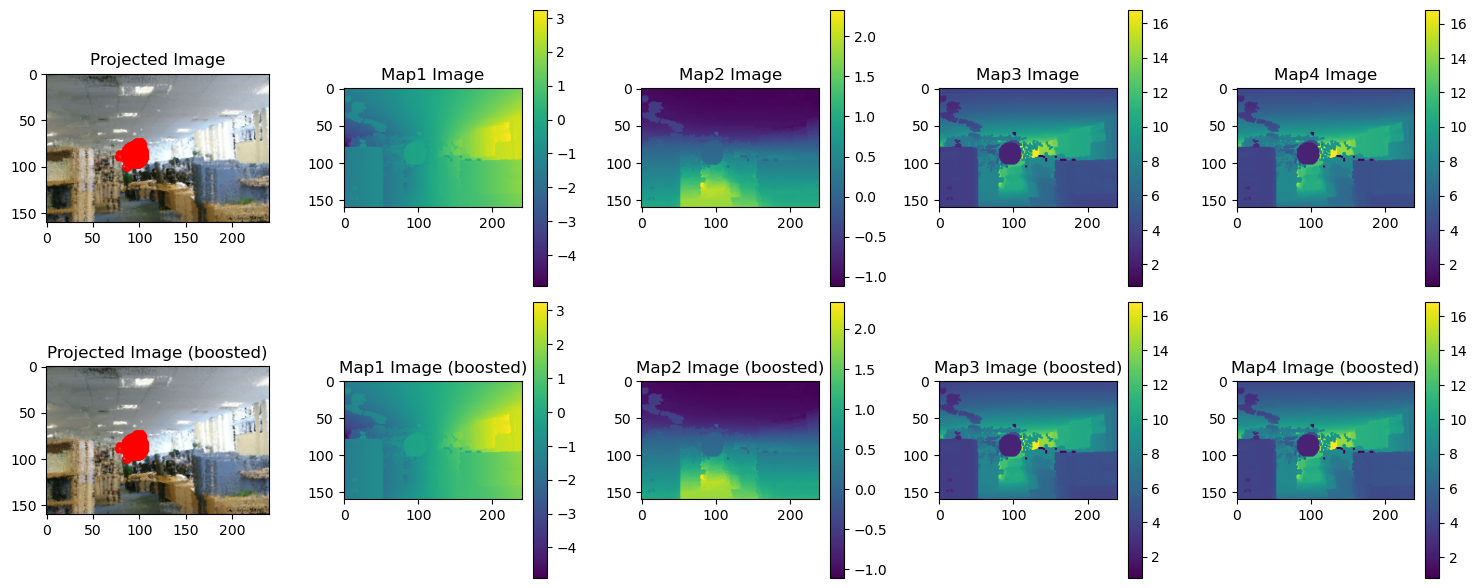

In [11]:
# set up subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# plot images w boosting
axes[0, 0].imshow(image)
axes[0, 0].set_title('Projected Image')

axes[0, 1].imshow(map1)
axes[0, 1].set_title('Map1 Image')
plt.colorbar(ax=axes[0, 1], mappable=axes[0, 1].images[0])

axes[0, 2].imshow(map2)
axes[0, 2].set_title('Map2 Image')
plt.colorbar(ax=axes[0, 2], mappable=axes[0, 2].images[0])

axes[0, 3].imshow(map3)
axes[0, 3].set_title('Map3 Image')
plt.colorbar(ax=axes[0, 3], mappable=axes[0, 3].images[0])

axes[0, 4].imshow(map4)
axes[0, 4].set_title('Map4 Image')
plt.colorbar(ax=axes[0, 4], mappable=axes[0, 4].images[0])

# plot images w boosting
axes[1, 0].imshow(image_boost)
axes[1, 0].set_title('Projected Image (boosted)')

axes[1, 1].imshow(map1_boost)
axes[1, 1].set_title('Map1 Image (boosted)')
plt.colorbar(ax=axes[1, 1], mappable=axes[1, 1].images[0])

axes[1, 2].imshow(map2_boost)
axes[1, 2].set_title('Map2 Image (boosted)')
plt.colorbar(ax=axes[1, 2], mappable=axes[1, 2].images[0])

axes[1, 3].imshow(map3_boost)
axes[1, 3].set_title('Map3 Image (boosted)')
plt.colorbar(ax=axes[1, 3], mappable=axes[1, 3].images[0])

axes[1, 4].imshow(map4_boost)
axes[1, 4].set_title('Map4 Image (boosted)')
plt.colorbar(ax=axes[1, 4], mappable=axes[1, 4].images[0])

plt.tight_layout()
plt.show()

> As obtained from the figure, the two results are basically the same.